<img src="https://i.imgur.com/olPPiRS.jpg" alt="Texto alternativo da imagem" style="float:left; margin-right:10px;" />

<h3 style="margin-left:150px; margin-right:10px;"> Instituto Federal de Educação, Ciência e Tecnologia de Minas Gerais
Campus Ibirité<h3>

<br></br>
* Autor: Pablo Teodoro Monteiro 
> Engenharia de Controle e Automação - IFMG
>> Cálculo Numérico
>>> Atividade 11

In [242]:
#Aprox polinomial geral

import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def polGeral(x, y, n):
    matrix = []
    Y = []
    for i in range(n+1):
        Y.append(sum(y[k]*(x[k]**i) for k in range(n+1)))
        for j in range(n+1):
            matrix.append(sum(x[k]**(i+j) for k in range(n+1)))
            #print(f'{sum(x[j]**(i*j + j) for k in range(n+1))} -> i = {i} j = {j} i*j+j = {i}*{j}+{j}')    # para debug
    
    A, B = matrix, Y
    A = np.array(A)
    A = A.reshape(n+1,n+1)                  # Matrix p/ solução criada
    B = np.array(B)                         # "Imagem" do sistema criada
    #print(f'A = \n{A}\nB = \n{B}')             # printa a matrix AX e o vetor solução B
    coef = np.linalg.solve(A, B)   # retorna um vetor com os coeficientes

    return coef

def Erro_polGeral(coef, x, y):   #coef -> array dos coeficientes, x -> dados em X, y -> dados em Y
    n = len(x)
    c = len(coef)
    #"sum(coef[i+1]*x[j] for i in range(c-1))  -> se refere ao 'somatório' dos termos do polinômio para comparação"
    soma = sum((y[j] - (coef[0] + sum(coef[i+1]*x[j] for i in range(c-1))) )**2 for j in range(n))
    return soma

#a = [1., 2., 3.]       # = vetor x para debug
#b = [2., 1., 2.]       # = vetor y para debug
#n = 2                  # = grau do polinômio para debug

#polGeral(a, b, 2)

# Matrix a mão a partir de x = [1, 2, 3] e y = [2, 1, 2] para aprox. polinomial geral
#A = np.array([[3., 6, 14],[6., 14, 36],[14., 36, 98]])
#B = np.array([5., 10, 24])
#np.linalg.solve(A, B)

In [243]:
#1 - Aprox. minimos quadrados linear

# (a, b) -> intervalo para a aproximação
# m -> numero de subintervalos


def minQuadLin(x, y):
    n = len(x)
    somaXY = sum(x[i]*y[i] for i in range(n))
    somaX = sum(x[i] for i in range(n))
    somaY = sum(y[i] for i in range(n))
    somaXsquare = sum(x[i]**2 for i in range(n))
    a = (n * somaXY - somaX*somaY)/(n*somaXsquare - somaX**2)
    b = (somaXsquare*somaY - somaXY*somaX)/(n*somaXsquare - somaX)
    return np.array([b,a])

def Erro_QuadLin(a, b, x, y):
    n = len(x)
    return sum((y[i] - (a*x[i] + b))**2 for i in range(n))

f(x) = 0.64 + 1.2*x 				 Erro: 0.001
f(x) = 0.823 + 0.85*x + 0.167*x²		 Erro: 0.0982583
f(x) = 1.66 + -1.38*x + 2.15*x² + -0.583*x³ 	 Erro: 2.55236


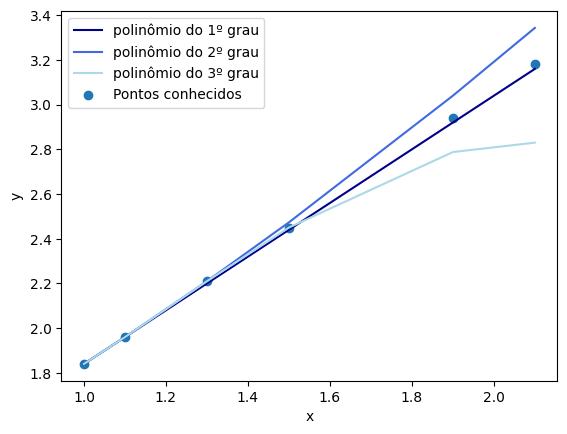

In [244]:
#2

x = [1.0, 1.1, 1.3, 1.5, 1.9, 2.1]
y = [1.84, 1.96, 2.21, 2.45, 2.94, 3.18]

Coef = []                                           # lista para armazenar os coeficientes (por grupos)
coefErro = []                                       # lista para armazenar os Erros (por caso)
for i in range(3):                  # cada loop inlcui nas listas os coeficientes para os polinômios de mínimos quadrados
    X = polGeral(x, y, i+1)       # variável auxiliar
    Coef.append(X)          #armazena os arrays(coeficientes) na lista
    #print(Coef[i])
    coefErro.append(Erro_polGeral(Coef[i], x, y)) #Armazena os arrays(erros) na lista
#print(Coef, '\n',coefErro,'\n\n')

print(f'f(x) = {Coef[0][0]:.3} + {Coef[0][1]:.3}*x \t\t\t\t Erro: {coefErro[0]:.6}')
print(f'f(x) = {Coef[1][0]:.3} + {Coef[1][1]:.3}*x + {Coef[1][2]:.3}*x²\t\t Erro: {coefErro[1]:.6}')
print(f'f(x) = {Coef[2][0]:.3} + {Coef[2][1]:.3}*x + {Coef[2][2]:.3}*x² + {Coef[2][3]:.3}*x³ \t Erro: {coefErro[2]:.6}')

x = np.array(x)

y1 = Coef[0][0] + Coef[0][1]*x
y2 = Coef[1][0] + Coef[1][1]*x + Coef[1][2]*x**2
y3 = Coef[2][0] + Coef[2][1]*x + Coef[2][2]*x**2 + Coef[2][3]*x**3

plt.plot(x,y1, color='darkblue', label=f'polinômio do 1º grau')
plt.plot(x,y2, color='royalblue', label=f'polinômio do 2º grau')
plt.plot(x,y3, color='lightblue', label=f'polinômio do 3º grau')
plt.scatter(x, y, label=f'Pontos conhecidos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

f(x) = 1.0 + 0.0267*x 				 Erro: 0.215717
f(x) = 1.0 + -0.0421*x + 0.458*x²		 Erro: 0.0341044
f(x) = 1.0 + -0.00928*x + 0.134*x² + 0.706*x³ 	 Erro: 0.270399


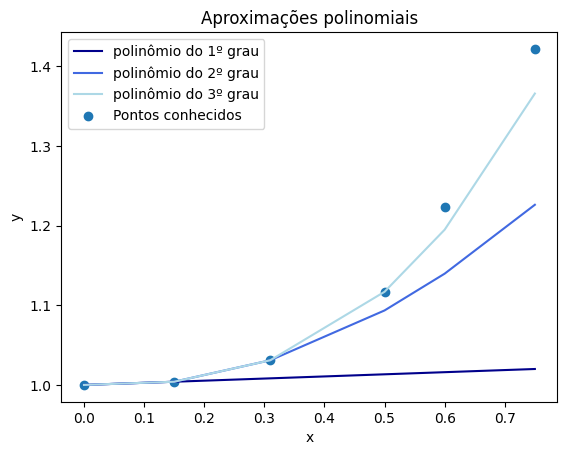

In [245]:
#3

x = [0., 0.15, 0.31, 0.5, 0.6, 0.75]
y = [1.0, 1.004, 1.031, 1.117, 1.223, 1.422]

Coef = []                                           # lista para armazenar os coeficientes (por grupos)
coefErro = []                                       # lista para armazenar os Erros (por caso)
for i in range(3):                  # cada loop inlcui nas listas os coeficientes para os polinômios de mínimos quadrados
    X = polGeral(x, y, i+1)       # variável auxiliar
    Coef.append(X)          #armazena os arrays(coeficientes) na lista
    #print(Coef[i])
    coefErro.append(Erro_polGeral(Coef[i], x, y)) #Armazena os arrays(erros) na lista
#print(Coef, '\n',coefErro,'\n\n')


#fazer o print das equações
print(f'f(x) = {Coef[0][0]:.3} + {Coef[0][1]:.3}*x \t\t\t\t Erro: {coefErro[0]:.6}')
print(f'f(x) = {Coef[1][0]:.3} + {Coef[1][1]:.3}*x + {Coef[1][2]:.3}*x²\t\t Erro: {coefErro[1]:.6}')
print(f'f(x) = {Coef[2][0]:.3} + {Coef[2][1]:.3}*x + {Coef[2][2]:.3}*x² + {Coef[2][3]:.3}*x³ \t Erro: {coefErro[2]:.6}')

x = np.array(x) #define a lista X como array para poder plotar gráfico

#Criar os vetores y para cada grau de aproximação
y1 = Coef[0][0] + Coef[0][1]*x
y2 = Coef[1][0] + Coef[1][1]*x + Coef[1][2]*x**2
y3 = Coef[2][0] + Coef[2][1]*x + Coef[2][2]*x**2 + Coef[2][3]*x**3

#Plot
plt.plot(x,y1, color='darkblue', label=f'polinômio do 1º grau')
plt.plot(x,y2, color='royalblue', label=f'polinômio do 2º grau')
plt.plot(x,y3, color='lightblue', label=f'polinômio do 3º grau')
plt.scatter(x, y, label=f'Pontos conhecidos')
plt.title('Aproximações polinomiais')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [246]:
#4

x = [4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1]
y = [102.56, 113.18, 130.11, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72]

New_coef = []                                           # lista para armazenar os coeficientes (por grupos)
NewCoefErro = []                                       # lista para armazenar os Erros (por caso)

for i in range(3):                  # cada loop inlcui nas listas os coeficientes para os polinômios de mínimos quadrados
    if(i==0):
        X = minQuadLin(x, y)       # variável auxiliar
        New_coef.append(X)          #armazena os arrays(coeficientes) na lista
        NewCoefErro.append(Erro_QuadLin(New_coef[i][1], New_coef[i][0], x, y)) #Armazena os arrays(erros) na lista
    else:
        X = polGeral(x, y, i+1)       # variável auxiliar
        New_coef.append(X)          #armazena os arrays(coeficientes) na lista
        NewCoefErro.append(Erro_polGeral(New_coef[i], x, y)) #Armazena os arrays(erros) na lista
        

for i in range(3):
    print(New_coef[i])
    

[-6.97706698 72.0845177 ]
[ 2.16000001 -1.56666667  6.66666667]
[ 16.56000133 -11.79523902   9.0857145   -0.19047621]


f(x) = -6.98 + 72.1*x 	Erro: 3.50622e+05


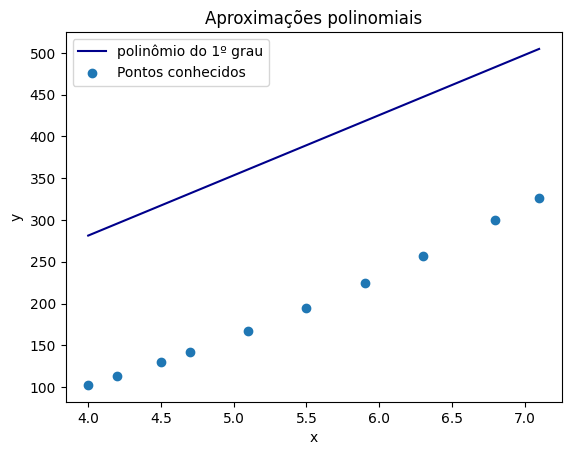

In [247]:
# 4-a)
#fazer o print das equações
print(f'f(x) = {New_coef[0][0]:.3} + {New_coef[0][1]:.3}*x \tErro: {NewCoefErro[0]:.6}')

x = np.array(x) #define a lista X como array para poder plotar gráfico

#Criar os vetores y para cada grau de aproximação
y1 = New_coef[0][0] + New_coef[0][1]*x

#Plot
plt.plot(x,y1, color='darkblue', label=f'polinômio do 1º grau')
plt.scatter(x, y, label=f'Pontos conhecidos')
plt.title('Aproximações polinomiais')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

f(x) = 2.16 + -1.57*x + 6.67*x²	 Erro: 3.24232e+05


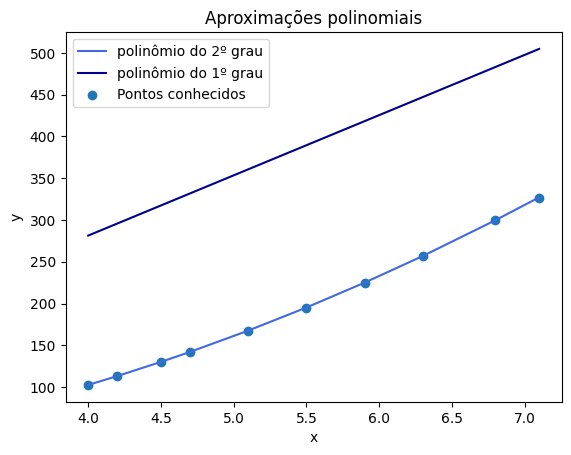

In [248]:
# 4-b)
print(f'f(x) = {New_coef[1][0]:.3} + {New_coef[1][1]:.3}*x + {New_coef[1][2]:.3}*x²\t Erro: {NewCoefErro[1]:.6}')

y2 = New_coef[1][0] + New_coef[1][1]*x + New_coef[1][2]*x**2

plt.plot(x,y2, color='royalblue', label=f'polinômio do 2º grau')
plt.plot(x,y1, color='darkblue', label=f'polinômio do 1º grau')
plt.scatter(x, y, label=f'Pontos conhecidos')
plt.title('Aproximações polinomiais')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

f(x) = 16.6 + -11.8*x + 9.09*x² + -0.19*x³ 	 Erro: 4.40667e+05


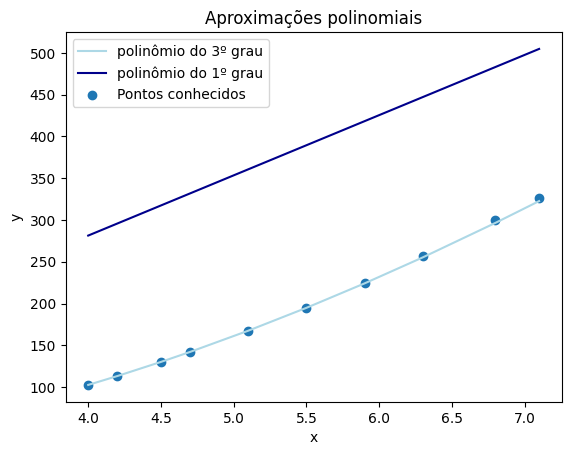

In [249]:
# 4-c)
print(f'f(x) = {New_coef[2][0]:.3} + {New_coef[2][1]:.3}*x + {New_coef[2][2]:.3}*x² + {New_coef[2][3]:.3}*x³ \t Erro: {NewCoefErro[2]:.6}')

y3 = New_coef[2][0] + New_coef[2][1]*x + New_coef[2][2]*x**2 + New_coef[2][3]*x**3

plt.plot(x,y3, color='lightblue', label=f'polinômio do 3º grau')
plt.plot(x,y1, color='darkblue', label=f'polinômio do 1º grau')
plt.scatter(x, y, label=f'Pontos conhecidos')
plt.title('Aproximações polinomiais')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()